<a href="https://colab.research.google.com/github/B-UDAY-CHANDRA-001/Machine_Learning_miniproject/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning**
Supervised machine learning algorithms derive insights, patterns, and relationships from a labeled training dataset. It means the dataset already contains a known value for the target variable for each record.  It is called supervised learning because the process of an algorithm learning from the training dataset is like an instructor supervising the learning process. You know the correct answers, the algorithm iteratively makes predictions on the training data and the instructor corrects it. Learning ends when the algorithm achieves the desired level of performance and accuracy.

Supervised learning problems can be further classified into regression and
classification problems.

1.  Classification: In a classification problem, the output variable is a category, such as “red” or “blue,” “disease” or “no disease,” “true” or “false,” etc.
2.  Regression: In a regression problem, the output variable is a real continuous value, such as “dollars” or “weight.

# **Logistic regression**


Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.
What are the types of logistic regression


1.   Binary (eg. Tumor Malignant or Benign)
2.   Multi-linear functions failsClass (eg. Cats, dogs or Sheep's)

We can call a ***Logistic Regression*** a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘*Sigmoid function*’ or also known as the ‘logistic function’ instead of a linear function.



Logistic regression is a generalized linear model. And it uses the same basic formula of linear regression


*   In linear regression, we predict the output variable Y base on the weighted sum of input variables.
*   In logistic regression, we perform the exact same thing but with one small addition. We pass the result through a special function known as the Sigmoid Function to predict the output Y.


**Advantages of the Logistic Regression Algorithm**


1.  Logistic regression performs better when the data is linearly separable
2.  It does not require too many computational resources as it’s highly interpretable
3.  There is no problem scaling the input features—It does not require tuning
4.  It is easy to implement and train a model using logistic regression
5.  It gives a measure of how relevant a predictor (coefficient size) is, and its direction of association (positive or negative)


**Logistic Regression Assumptions**

1. In case of binary logistic regression, the target variables must be binary always and the desired outcome is represented by the factor level 1.

2.   There should not be any multi-collinearity in the model, which means the independent variables must be independent of each other.

3.   We must include meaningful variables in our model.

4.   We should choose a large sample size for logistic regression.



**Applications of Logistic Regression**


applications of logistic regression:

1. Predicting a probability of a person having a heart attack

2. Predicting a customer’s propensity to purchase a product or halt a subscription.

3. Predicting the probability of failure of a given process or product.


**Libraries used for Logistic regression:**

One of the most amazing things about Python’s **scikit-learn** library is that is has a 4-step modeling pattern that makes it easy to code a machine learning classifier.

*  Step 1. Import the model you want to use
*  Step 2. Make an instance of the Model
*  Step 3. Training the model on the data, storing the information learned from the data
*  Step 4. Predict labels for new data








# **Libraries and Dataset Reading**

In [524]:
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [525]:
dataset = pd.read_csv("train.csv")

In [526]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Data Analytics**

In [527]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


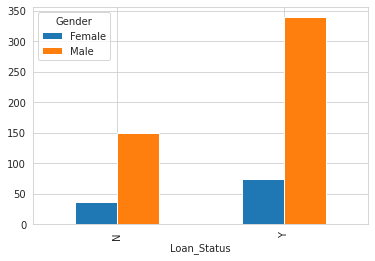

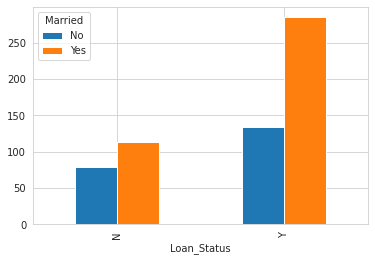

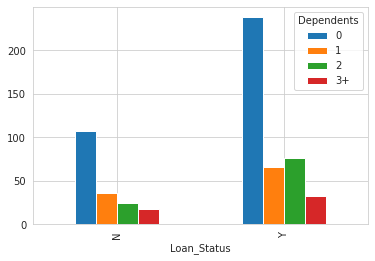

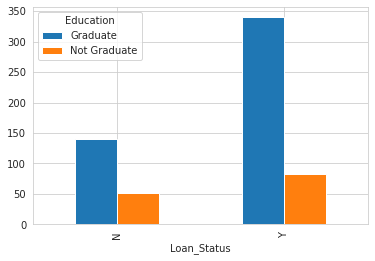

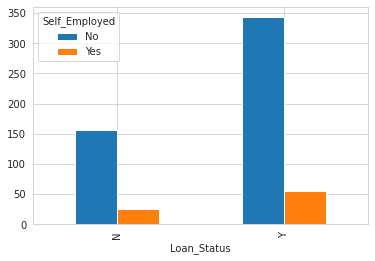

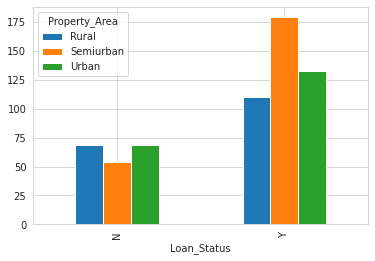

In [528]:
columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']
for i in columns:
           df=dataset.groupby(['Loan_Status',i]).size()
           df=df.unstack()
           df.plot(kind='bar')

In [529]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# **Handling missing data**

In [530]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

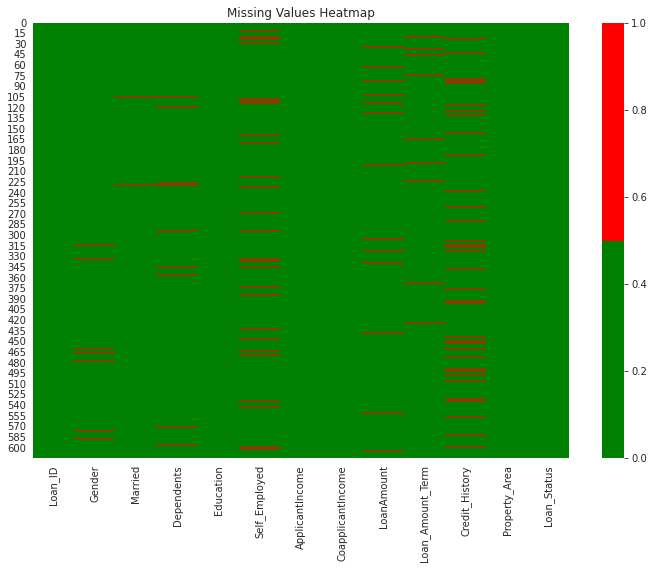

In [531]:
cols = dataset.columns 
colours = ['g', 'r'] 
f, ax = plt.subplots(figsize = (12,8))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours));



1.   Red lines represents missing data



**percentage of the missing values**

In [532]:
for col in dataset.columns:
    prct = np.mean(dataset[col].isnull())
    print('{}-----------------------------------{}%'.format(col, prct*100))

Loan_ID-----------------------------------0.0%
Gender-----------------------------------2.1172638436482085%
Married-----------------------------------0.4885993485342019%
Dependents-----------------------------------2.44299674267101%
Education-----------------------------------0.0%
Self_Employed-----------------------------------5.211726384364821%
ApplicantIncome-----------------------------------0.0%
CoapplicantIncome-----------------------------------0.0%
LoanAmount-----------------------------------3.5830618892508146%
Loan_Amount_Term-----------------------------------2.2801302931596092%
Credit_History-----------------------------------8.143322475570033%
Property_Area-----------------------------------0.0%
Loan_Status-----------------------------------0.0%


**Filling NA values**

In [533]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)


dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True) 

In [534]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Encoding Categorical Data**

In [535]:
le = LabelEncoder()

In [536]:
df = dataset

In [537]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])



In [538]:
df['Dependents'].replace('0', 0,inplace=True) 
df['Dependents'].replace('1', 1,inplace=True) 
df['Dependents'].replace('2', 2,inplace=True) 
df['Dependents'].replace('3+', 3,inplace=True) 

In [539]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


## **Correlation Matrix**

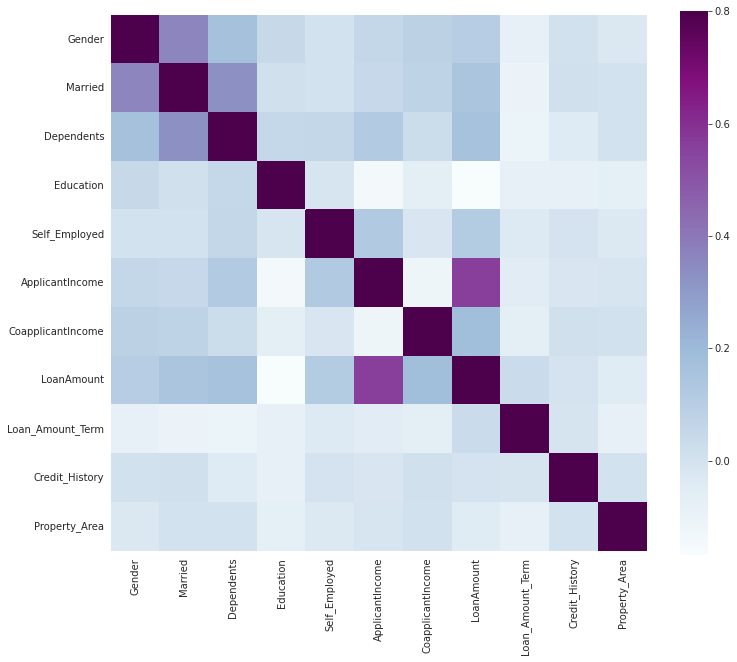

In [540]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.
We see that the most correlated variables:


1.   Applicant Income - LoanAmount
2.   Credit_History - Loan_Status
3.   LoanAmount - CoapplicantIncome




# **Data Preprocessing**

In [541]:
X_features = df.drop(['Loan_Status','Loan_ID'],axis=1)
target = df['Loan_Status']

In [542]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target,test_size=0.25, random_state=11)

In [544]:
y_test

255    Y
471    N
150    N
387    N
174    N
      ..
492    Y
6      Y
240    Y
584    N
204    Y
Name: Loan_Status, Length: 154, dtype: object

# **Logistic Regression:**

In [545]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
Log_Regressor = LogisticRegression()

In [546]:
Log_Regressor.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
print('LogisticRegression Accuracy: {0:.4f}%'.format(accuracy_score(y_test, pred)*100))


LogisticRegression Accuracy: 81.8182%


**LogisticRegression Accuracy: 81.8182%**